In [17]:
import numpy as np
import pickle
from matplotlib import pyplot as plt

In [18]:
def getMPPSignalPlot(exp_no, tag1, tag2, freq, processedDF):
    # freq in mhz
    plt.subplot(2,1,1)
    plt.plot(processedDF[(processedDF['Run Exp Num']==exp_no) & (processedDF['Rx']==tag1) & (processedDF['Tx']==tag2) & (processedDF['Frequency (MHz)']==freq)]["Voltages (mV)"].to_numpy()[0])
    plt.title(f"Rx={tag1}, Tx={tag2}")
    
    plt.subplot(2,1,2)
    v=processedDF[(processedDF['Run Exp Num']==exp_no) & (processedDF['Rx']==tag2) & (processedDF['Tx']==tag1) & (processedDF['Frequency (MHz)']==freq)]["Voltages (mV)"].to_numpy()[0]
    plt.plot(v)
    plt.ylim([np.percentile(v,1), np.percentile(v,99)])
    plt.title(f"Rx={tag2}, Tx={tag1}")
    
    plt.suptitle(f"Exp={exp_no}, freq={freq}")
    plt.tight_layout()
    plt.show()

In [19]:
steps=[1,2,3,4]
# steps=[1]

In [20]:
with open(f'distances.pkl', 'rb') as f:
    all_distances=pickle.load(f)
    

In [21]:
all_phase_info={}
for step in steps:
    with open(f"Step{step}/no_correction_all_phases.pkl", 'rb') as f:
        all_phase_info[step] = pickle.load(f)

In [22]:
all_voltage_dfs={}
for step in steps:
    with open(f"Step{step}/processedDF.pkl", 'rb') as f:
        all_voltage_dfs[step] = pickle.load(f)

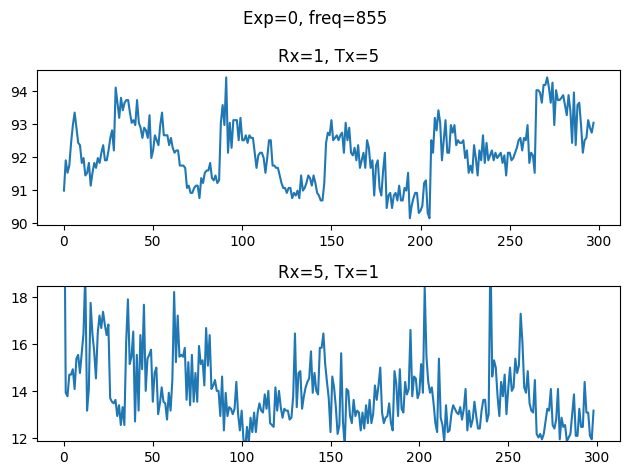

In [79]:
step=1
getMPPSignalPlot(exp_no=0, tag1=1, tag2=5, freq=855, processedDF=all_voltage_dfs[step])

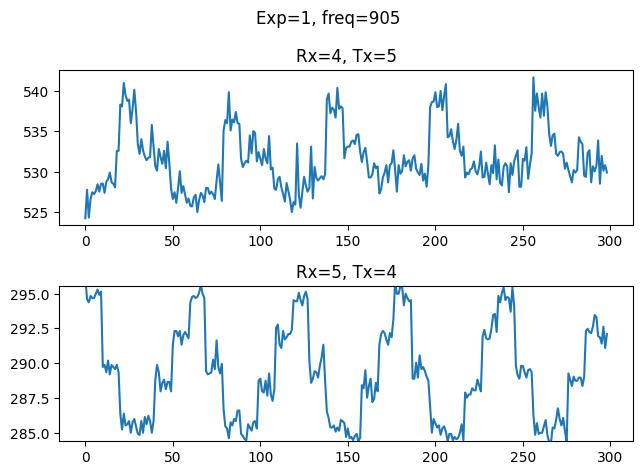

In [ ]:
step=1
getMPPSignalPlot(exp_no=1, tag1=4, tag2=5, freq=905, processedDF=all_voltage_dfs[step])

In [71]:
# list(all_phase_info[1].keys())[8:19]

In [42]:
def plot_phases(step, exp1, exp2, link1, link2, start_freq_idx=8, end_freq_idx=19):
    global all_distances, all_phase_info, all_freqs
    plt.figure(figsize=(10,6))
    l1_ph=[]
    l2_ph=[]
    all_freqs=list(all_phase_info[step].keys())[start_freq_idx:end_freq_idx]
    for freq in all_freqs:
        l1_ph.append(all_phase_info[step][freq][exp1][0][link1])
        l2_ph.append(all_phase_info[step][freq][exp2][0][link2])

    l1_ph=np.array(l1_ph)
    l2_ph=np.array(l2_ph)
    d_exp1=np.round(all_distances[step][exp1][link1],4)
    d_exp2=np.round(all_distances[step][exp2][link2],4)

    plt.subplot(2,1,1)
    plt.plot(all_freqs,np.rad2deg(l1_ph), '.-', label=f"{link1}, exp {exp1}")
    plt.plot(all_freqs,np.rad2deg(l2_ph), '.-', label=f"{link2}, exp {exp2}")
    plt.legend()
    plt.xticks(np.arange(all_freqs[0],all_freqs[-1]+1, 10e6))
    plt.ylim([0,185])
    plt.xlabel("Freq (Hz)")
    plt.ylabel("Phase (rad)")
    plt.yticks(np.arange(0,181,10))
    plt.grid()
    plt.title(f"Exp{exp1}, link:{link1}, d={d_exp1}; Exp{exp2}, link:{link2}, d={d_exp2}")

    plt.subplot(2,1,2)
    plt.plot(all_freqs, np.abs(np.rad2deg(l1_ph-l2_ph)), label=f"abs(ph_{link1} - ph_{link2})")
    plt.ylabel("Abs delta phase")
    plt.ylim([0,185])
    plt.legend()
    plt.grid()
    plt.xticks(np.arange(all_freqs[0],all_freqs[-1]+1, 10e6))
    plt.yticks(np.arange(0,181,10))
    plt.tight_layout()
    plt.show()

In [66]:
def plot_phase_freq_wise(step_exp_links: list, freqs: list):
    global all_distances, all_phase_info, all_freqs
    plt.figure(figsize=(10,3*len(freqs)))
    for freq_idx, freq in enumerate(freqs):
        ph_lst=[]
        label_lst=[]
        for step, exp, link in step_exp_links:
            ph_lst.append(all_phase_info[step][freq][exp][0][link])
            label_lst.append(f"S{step}_E{exp}_{link}\nD={np.round(all_distances[step][exp][link],4)}")
        
        plt.subplot(len(freqs),1,freq_idx+1)
        plt.plot(np.rad2deg(ph_lst), marker='o')   # plot values
        plt.xticks(ticks=range(len(ph_lst)), labels=label_lst)  # set custom labels
        plt.ylim([0, 181])
        plt.yticks(np.arange(0,181,20))
        plt.xlabel("Labels")
        plt.ylabel("Phase [deg]")
        plt.grid(True)
        plt.title(freq)
    
    plt.tight_layout()
    plt.show()

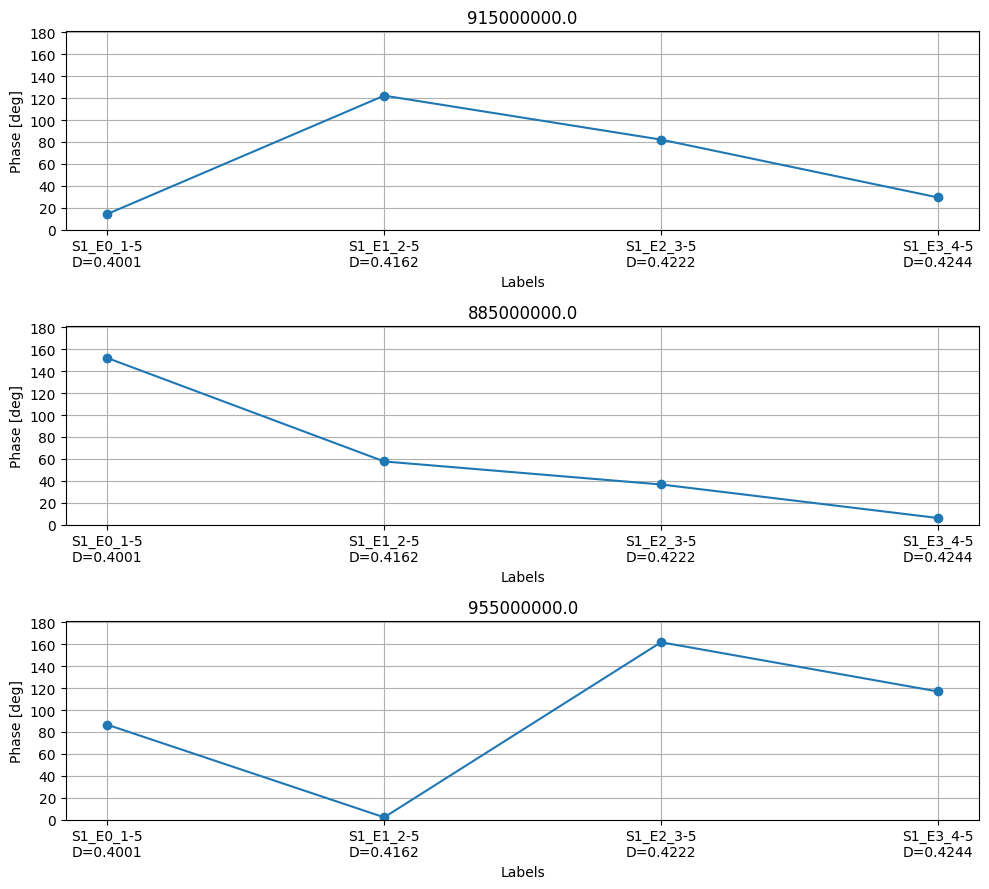

In [67]:
plot_phase_freq_wise(step_exp_links = [
                        (1, 0, '1-5'),
                        (1, 1, '2-5'),
                        (1, 2, '3-5'),
                        (1, 3, '4-5'),
                    ],
                    freqs= [915e6, 885e6, 955e6])

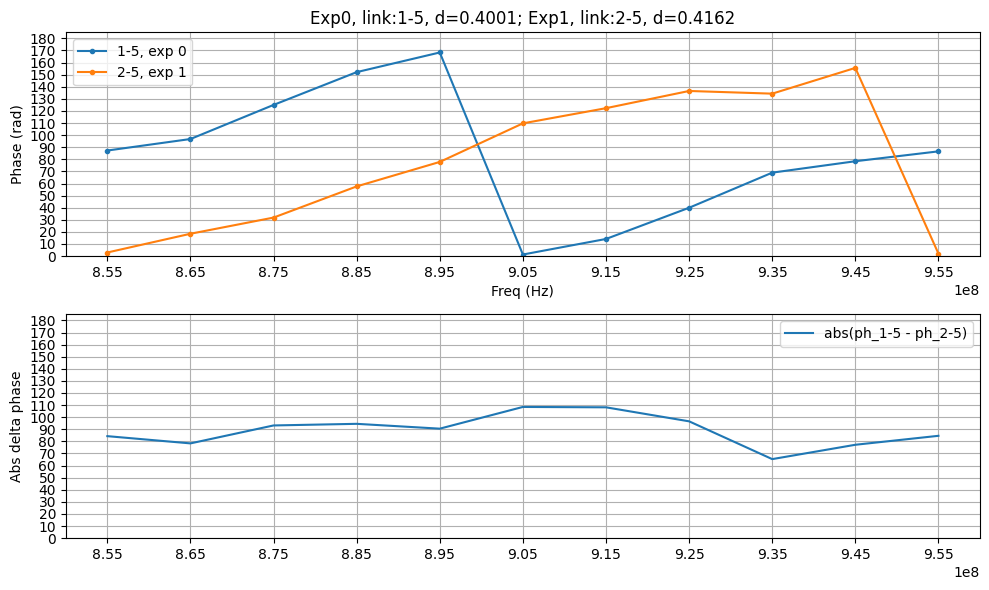

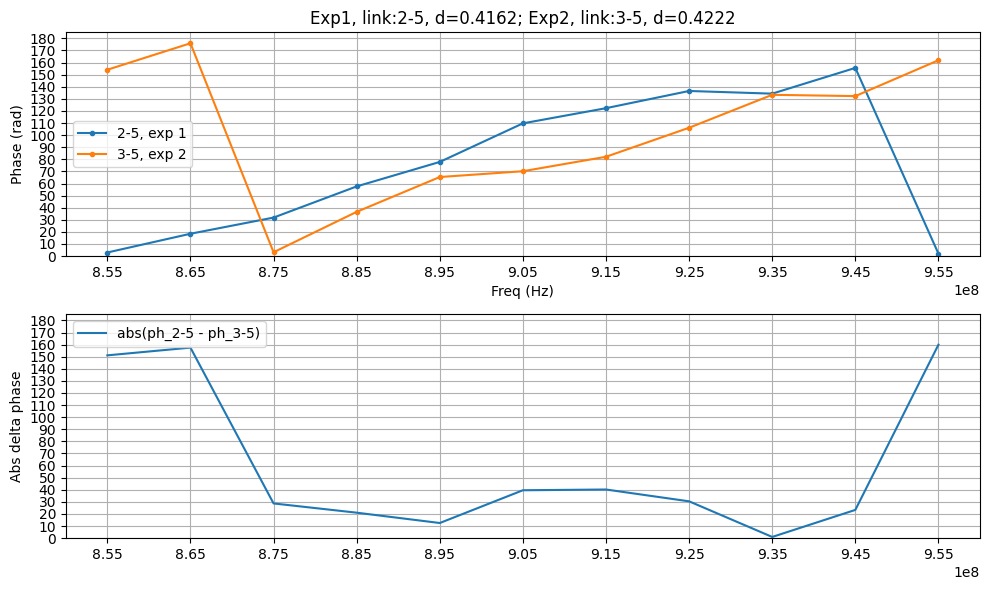

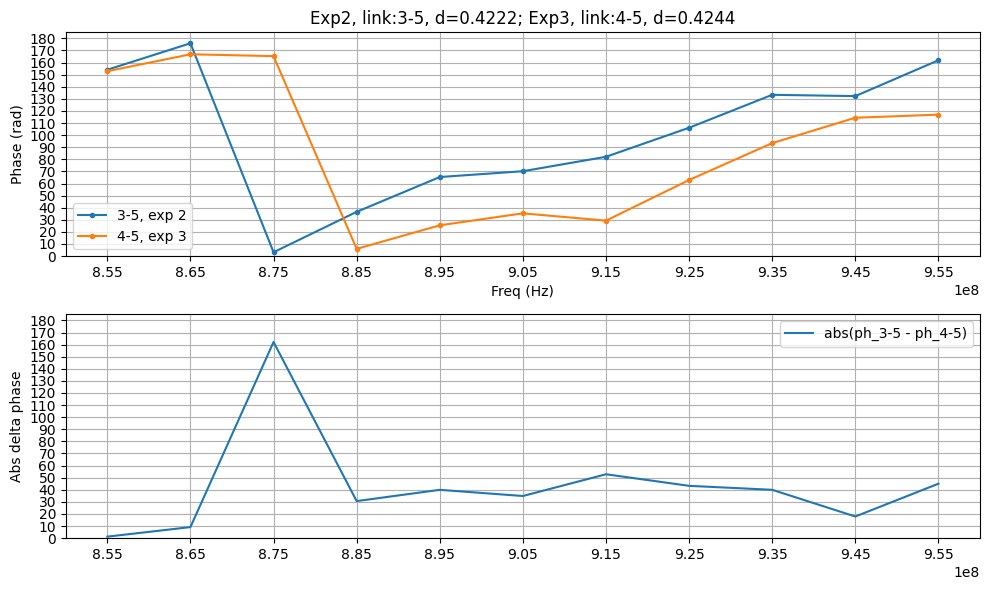

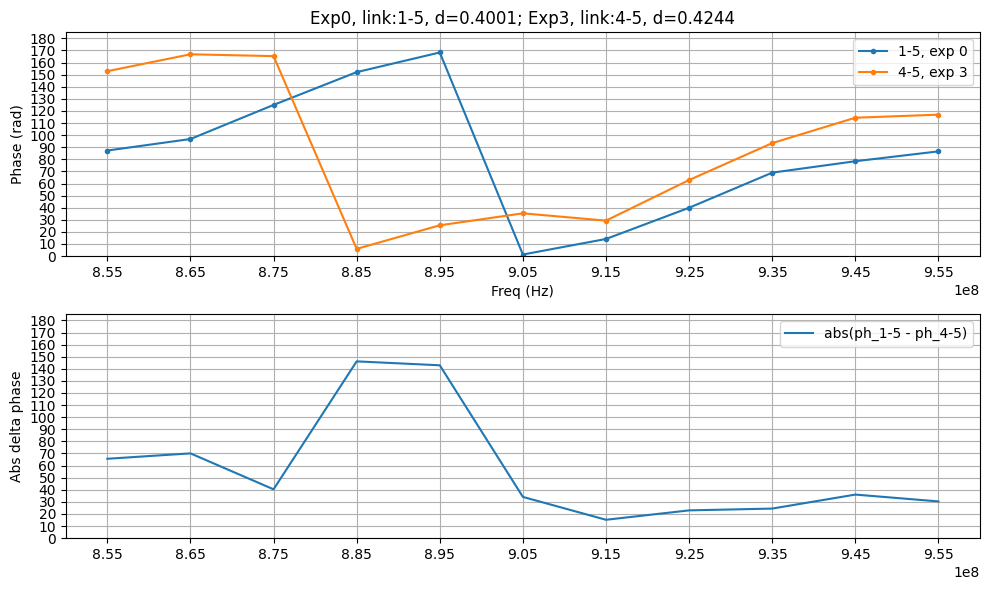

In [43]:
plot_phases(step=1, exp1=0, exp2=1, link1='1-5', link2='2-5')
plot_phases(step=1, exp1=1, exp2=2, link1='2-5', link2='3-5')
plot_phases(step=1, exp1=2, exp2=3, link1='3-5', link2='4-5')
plot_phases(step=1, exp1=0, exp2=3, link1='1-5', link2='4-5')

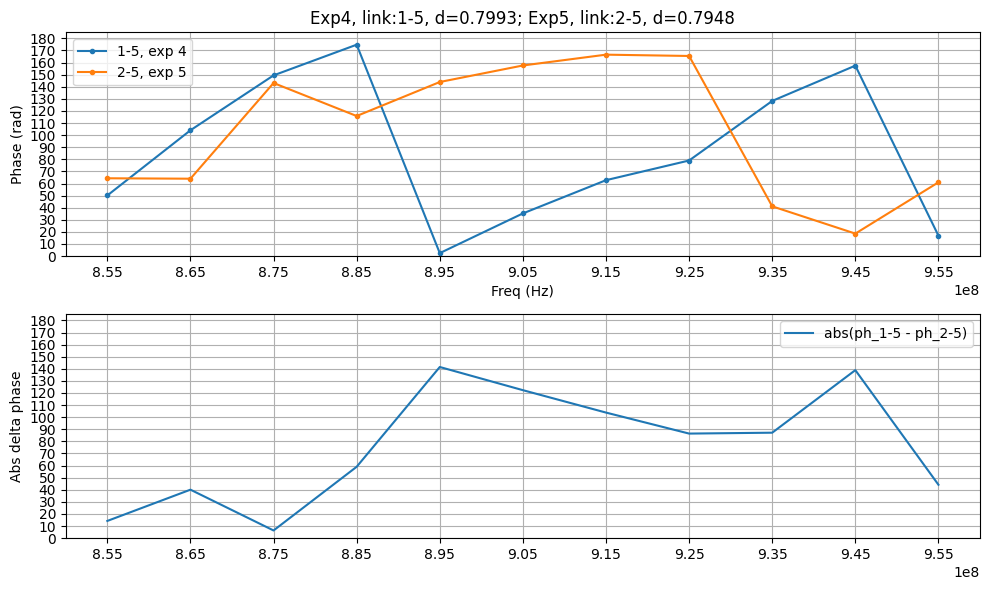

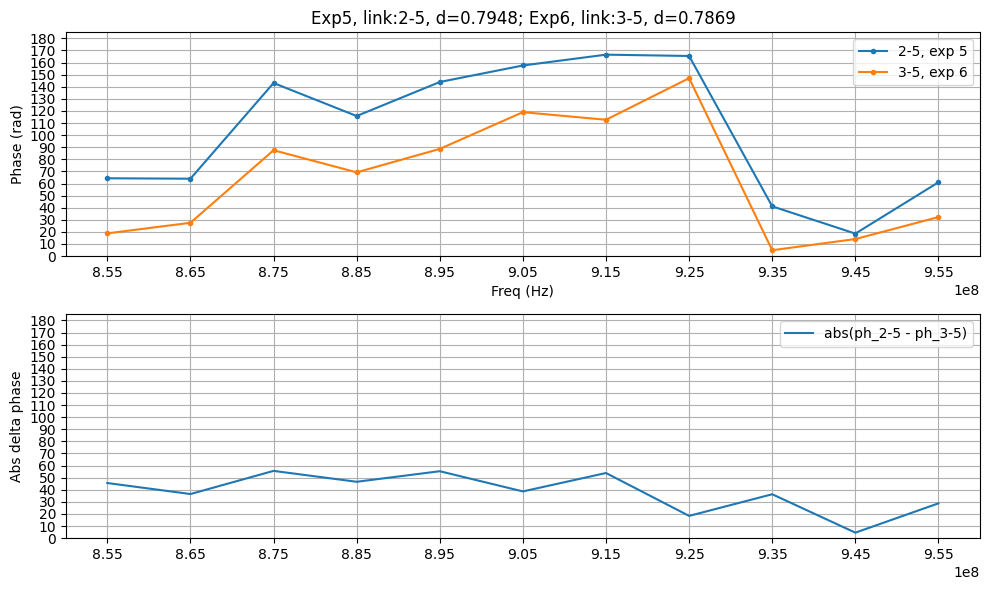

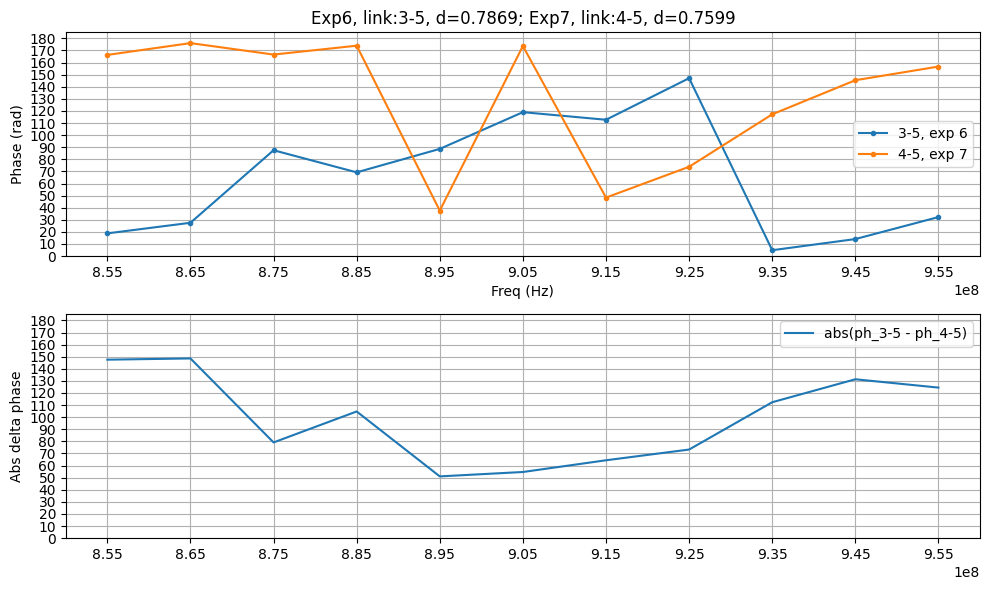

In [72]:
plot_phases(step=1, exp1=4, exp2=5, link1='1-5', link2='2-5')
plot_phases(step=1, exp1=5, exp2=6, link1='2-5', link2='3-5')
plot_phases(step=1, exp1=6, exp2=7, link1='3-5', link2='4-5')
# plot_phases(step=1, exp1=0, exp2=3, link1='1-5', link2='4-5')

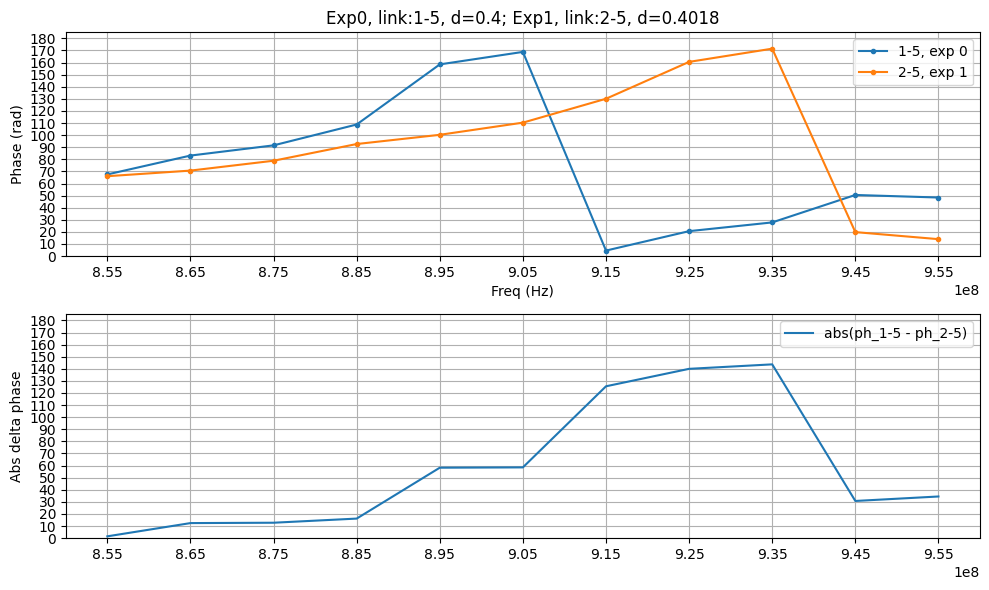

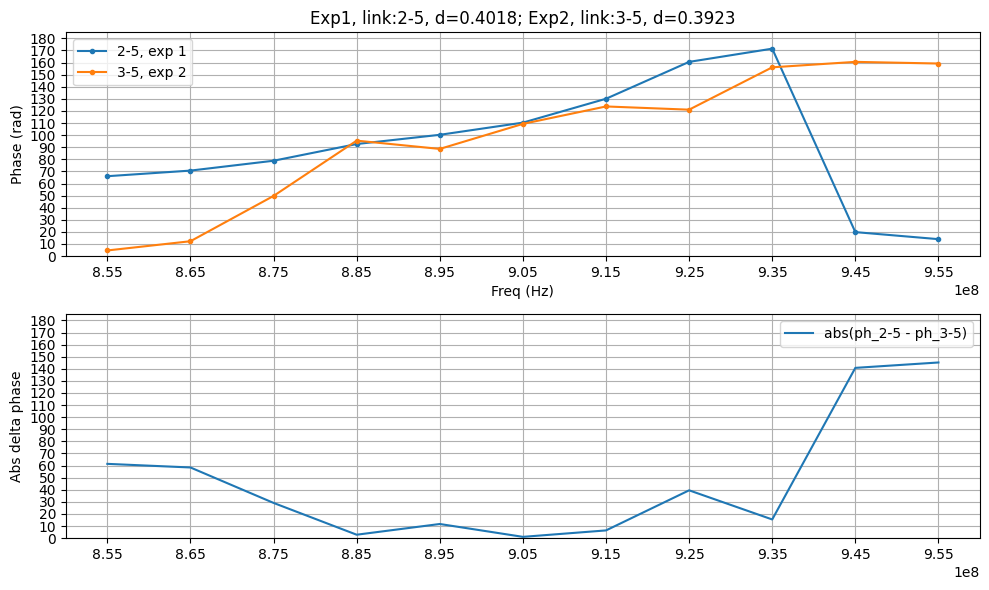

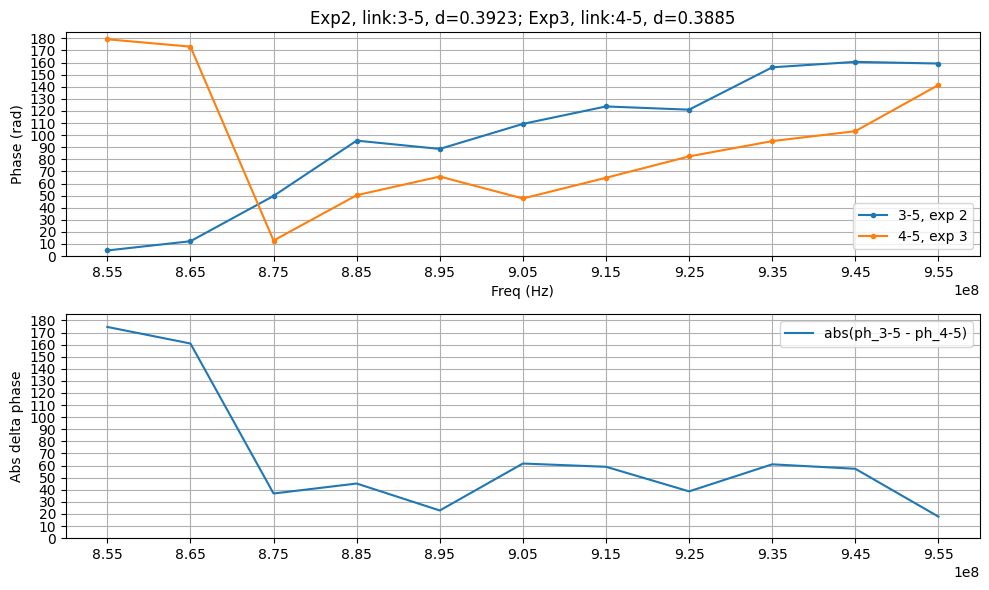

In [74]:
plot_phases(step=2, exp1=0, exp2=1, link1='1-5', link2='2-5')
plot_phases(step=2, exp1=1, exp2=2, link1='2-5', link2='3-5')
plot_phases(step=2, exp1=2, exp2=3, link1='3-5', link2='4-5')
# plot_phases(step=1, exp1=0, exp2=3, link1='1-5', link2='4-5')

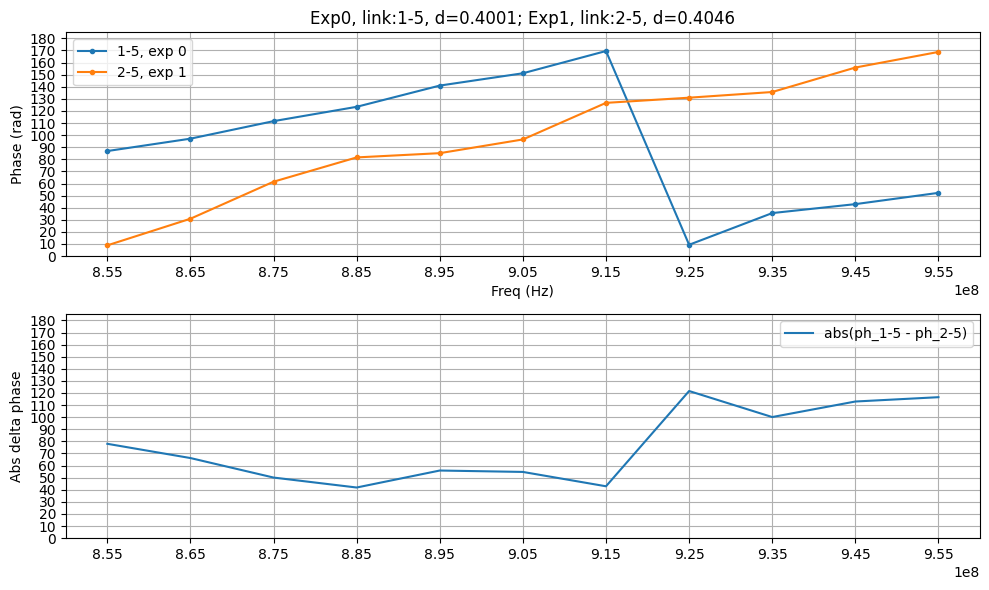

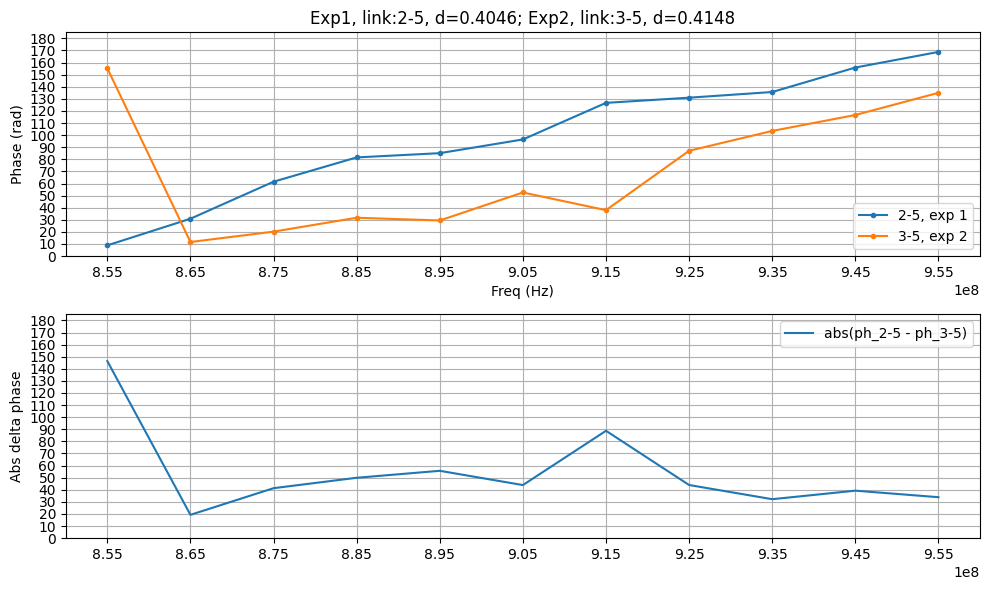

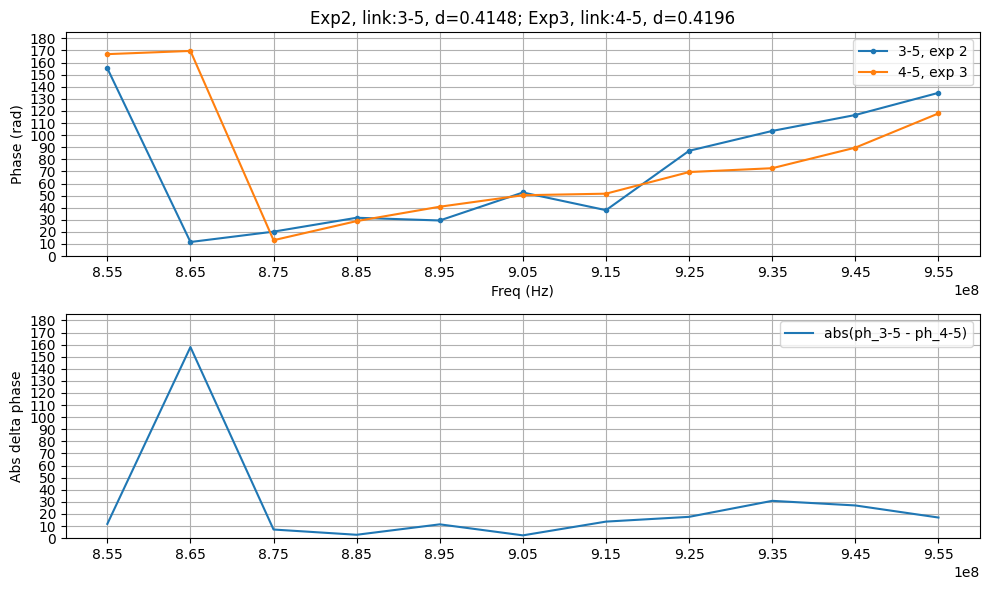

In [75]:
plot_phases(step=3, exp1=0, exp2=1, link1='1-5', link2='2-5')
plot_phases(step=3, exp1=1, exp2=2, link1='2-5', link2='3-5')
plot_phases(step=3, exp1=2, exp2=3, link1='3-5', link2='4-5')

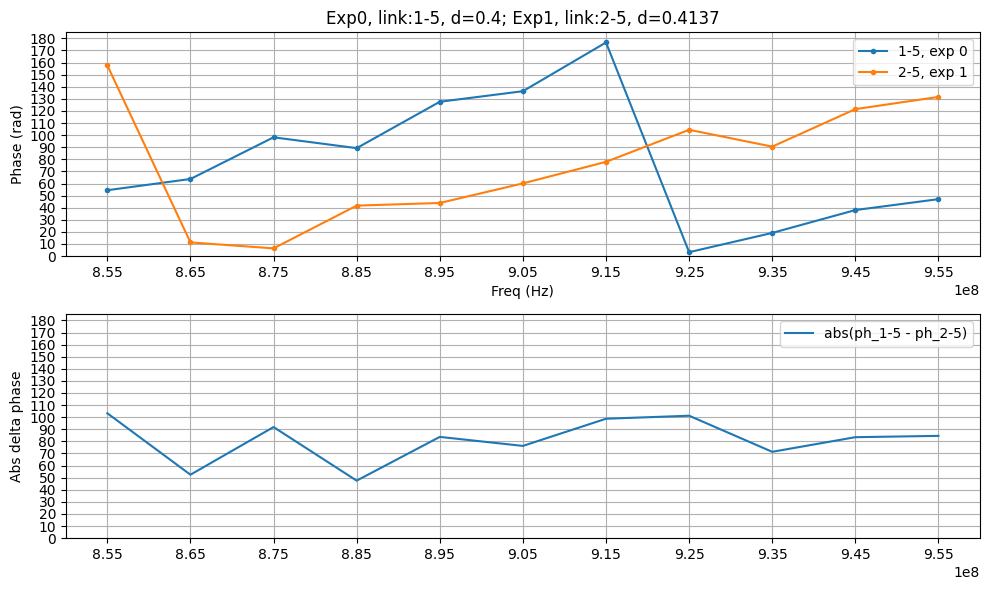

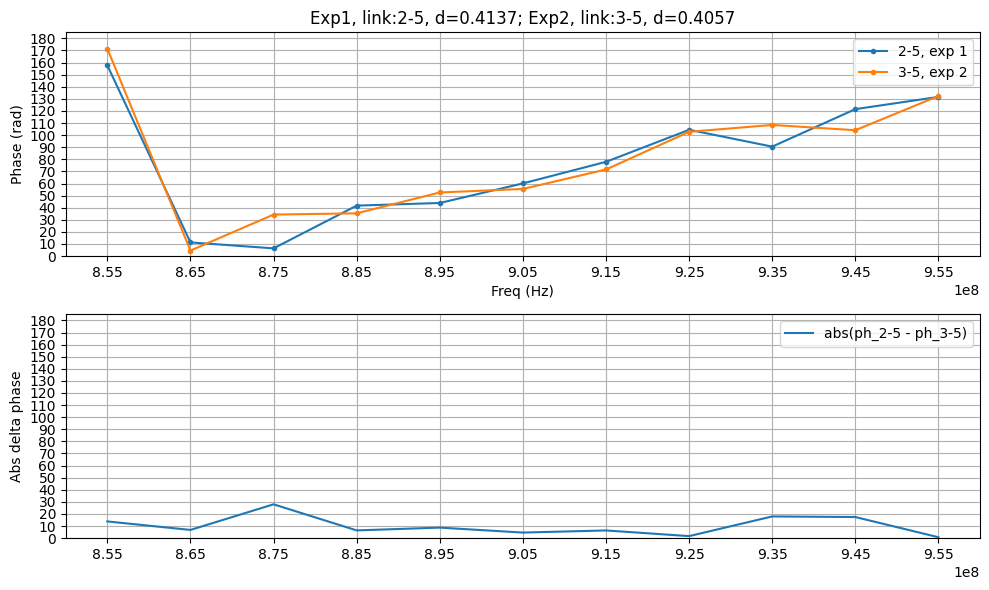

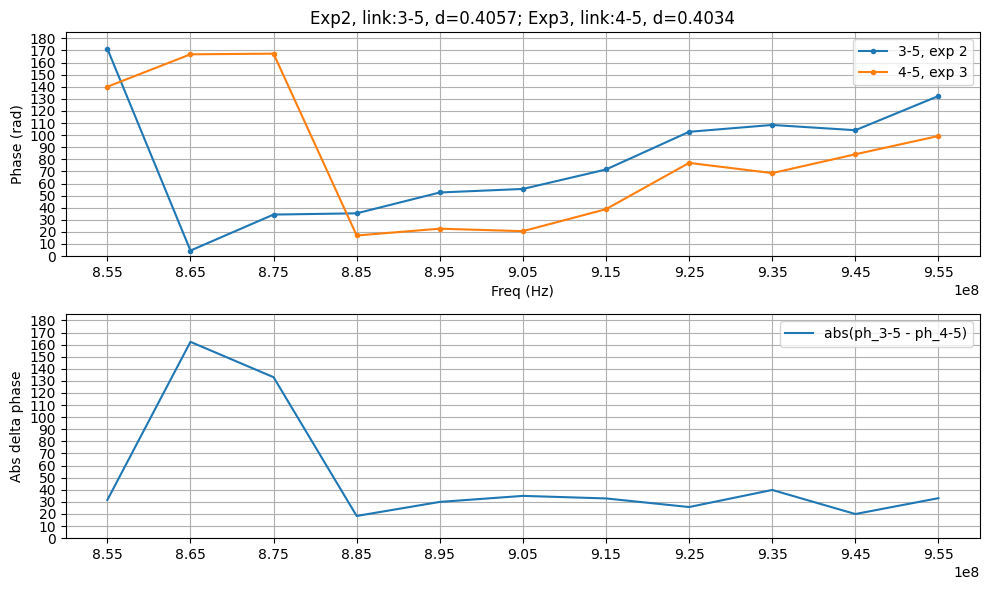

In [76]:
plot_phases(step=4, exp1=0, exp2=1, link1='1-5', link2='2-5')
plot_phases(step=4, exp1=1, exp2=2, link1='2-5', link2='3-5')
plot_phases(step=4, exp1=2, exp2=3, link1='3-5', link2='4-5')

In [28]:
def theta(d,f):
    return (2*np.pi*d*f/3e8)%np.pi

In [29]:
np.rad2deg(theta(0.4001, 915e6)-theta(0.4244, 915e6))

np.float64(-26.681400000000007)